In [83]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [84]:
df = pd.read_excel('premiums.xlsx')
df.head()

Age  Gender     Region Marital_status  Number Of Dependants BMI_Category  \
0   26    Male  Northwest      Unmarried                     0       Normal   
1   29  Female  Southeast        Married                     2      Obesity   
2   49  Female  Northeast        Married                     2       Normal   
3   30  Female  Southeast        Married                     3       Normal   
4   18    Male  Northeast      Unmarried                     0   Overweight   

  Smoking_Status Employment_Status Income_Level  Income_Lakhs  \
0     No Smoking          Salaried         <10L             6   
1        Regular          Salaried         <10L             6   
2     No Smoking     Self-Employed    10L - 25L            20   
3     No Smoking          Salaried        > 40L            77   
4        Regular     Self-Employed        > 40L            99   

       Medical History Insurance_Plan  Annual_Premium_Amount  
0             Diabetes         Bronze                   9053  
1             Diabetes         Bronze                  16339  
2  High blood pressure         Silver                  18164  
3           No Disease           Gold                  20303  
4  High blood pressure         Silver                  13365

In [85]:
df.shape

(50000, 13)

In [86]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df.columns
df.head(3)

age  gender     region marital_status  number_of_dependants bmi_category  \
0   26    Male  Northwest      Unmarried                     0       Normal   
1   29  Female  Southeast        Married                     2      Obesity   
2   49  Female  Northeast        Married                     2       Normal   

  smoking_status employment_status income_level  income_lakhs  \
0     No Smoking          Salaried         <10L             6   
1        Regular          Salaried         <10L             6   
2     No Smoking     Self-Employed    10L - 25L            20   

       medical_history insurance_plan  annual_premium_amount  
0             Diabetes         Bronze                   9053  
1             Diabetes         Bronze                  16339  
2  High blood pressure         Silver                  18164

### Handling NA values

In [ ]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [88]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

### Handling duplicates 

In [89]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [90]:
df.describe()

age  number_of_dependants  income_lakhs  annual_premium_amount
count  49976.000000          49976.000000  49976.000000           49976.000000
mean      34.591764              1.711842     23.021150           15766.810189
std       15.000378              1.498195     24.221794            8419.995271
min       18.000000             -3.000000      1.000000            3501.000000
25%       22.000000              0.000000      7.000000            8607.750000
50%       31.000000              2.000000     17.000000           13928.000000
75%       45.000000              3.000000     31.000000           22273.500000
max      356.000000              5.000000    930.000000           43471.000000

### Handling outliers

In [ ]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-3, -1], dtype=int64)

In [ ]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([], dtype=int64)

In [ ]:
numeric_columns = df.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

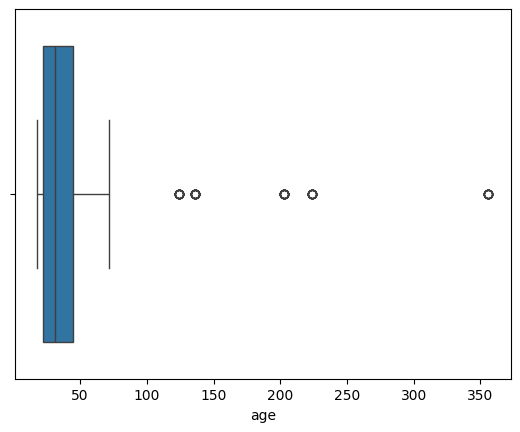

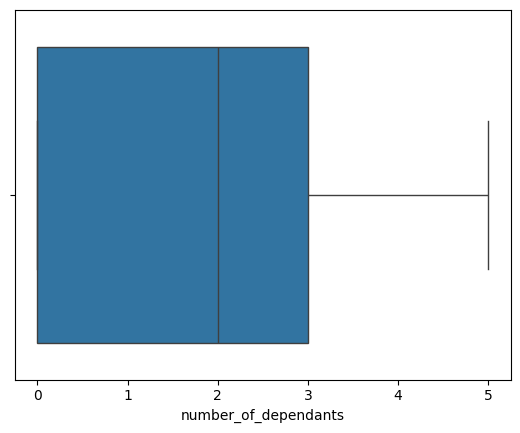

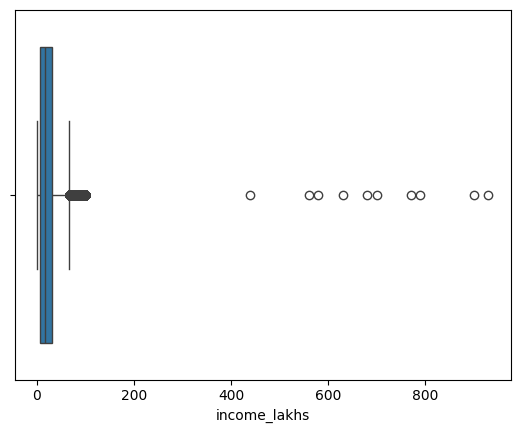

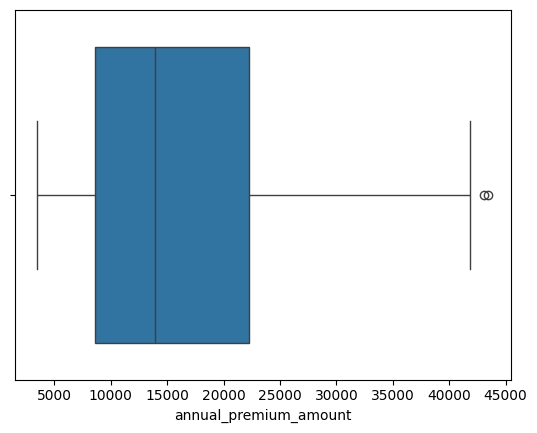

In [94]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [ ]:
df[df.age>100]['age'].unique() 


array([224, 124, 136, 203, 356], dtype=int64)

In [96]:
df1 = df[df.age<=100].copy()
df1.describe()

age  number_of_dependants  income_lakhs  annual_premium_amount
count  49918.000000          49918.000000  49918.000000           49918.000000
mean      34.401839              1.717617     23.025141           15766.589286
std       13.681600              1.492074     24.227912            8419.137327
min       18.000000              0.000000      1.000000            3501.000000
25%       22.000000              0.000000      7.000000            8608.000000
50%       31.000000              2.000000     17.000000           13928.000000
75%       45.000000              3.000000     31.000000           22272.000000
max       72.000000              5.000000    930.000000           43471.000000

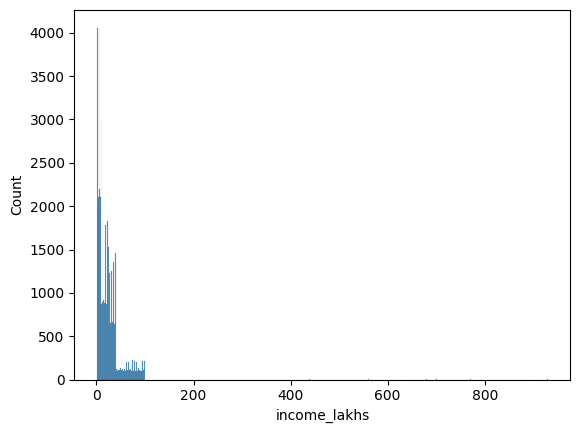

In [97]:
sns.histplot(df1.income_lakhs)
plt.show()

In [ ]:
income_quantile_threshold = df1.income_lakhs.quantile(0.999)
income_quantile_threshold  

100.0

In [99]:
df2 = df1[df1.income_lakhs<=income_quantile_threshold].copy()
df2.shape

(49908, 13)

### Data Distributions

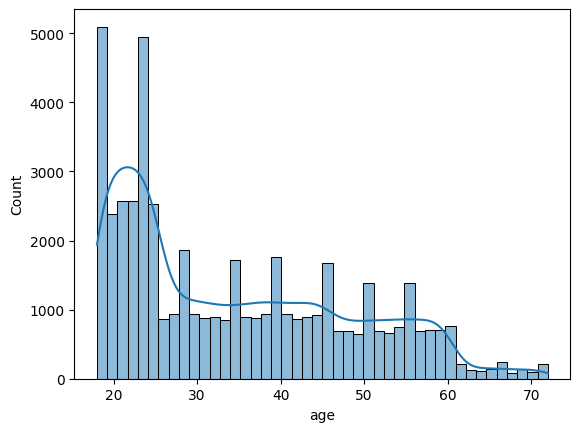

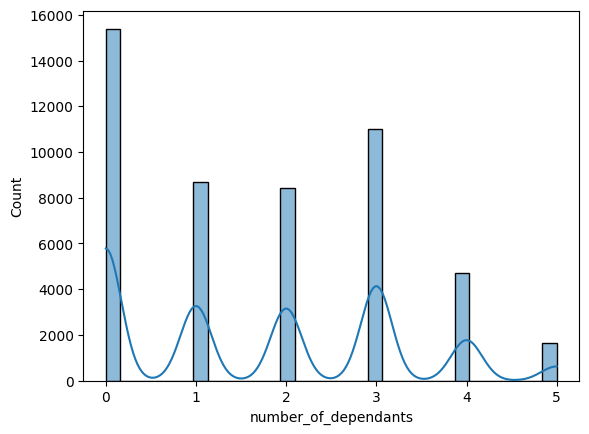

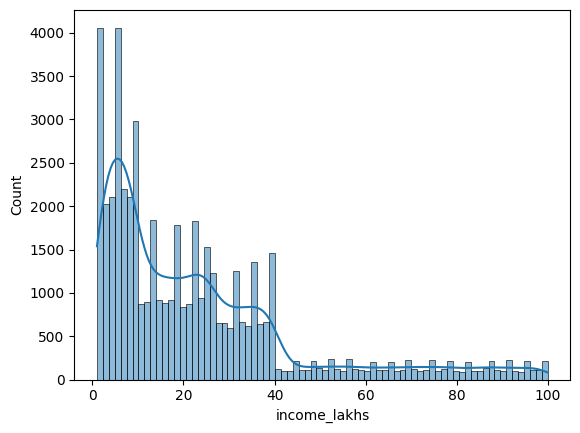

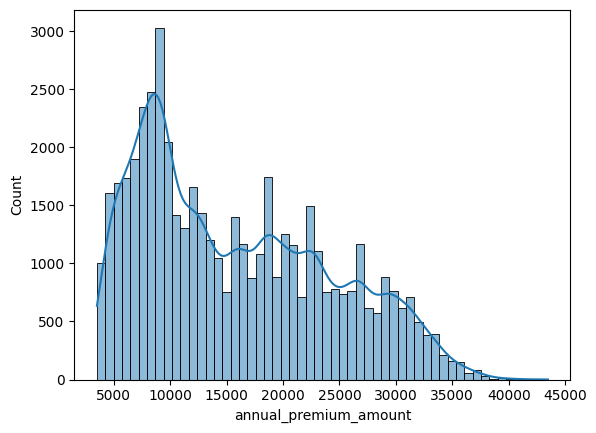

In [100]:
for col in numeric_columns:
    sns.histplot(df2[col],kde=True)
    plt.show()

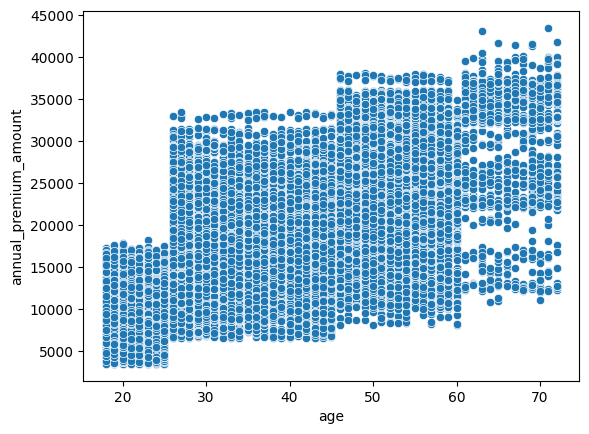

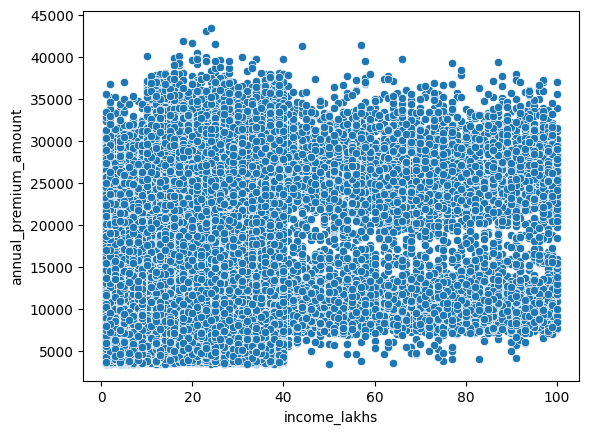

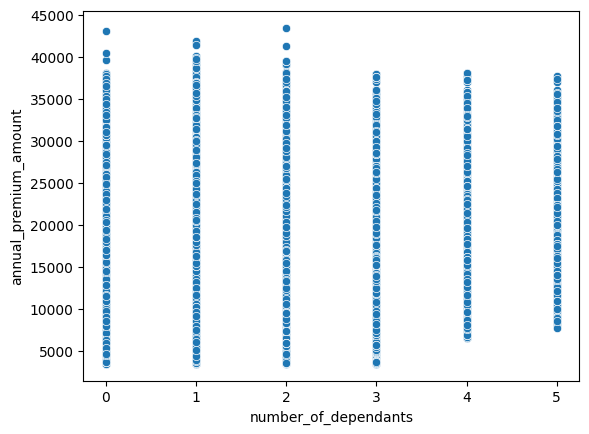

In [101]:
numeric_features = ['age','income_lakhs','number_of_dependants']

for col in numeric_features:
    sns.scatterplot(df2,x=col,y='annual_premium_amount')
    plt.show()

In [102]:
categorical_features = df2.select_dtypes(['object']).columns
categorical_features

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [103]:
for col in categorical_features:
    print(col, "->",df2[col].unique())

gender -> ['Male' 'Female']
region -> ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status -> ['Unmarried' 'Married']
bmi_category -> ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status -> ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status -> ['Salaried' 'Self-Employed' 'Freelancer']
income_level -> ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history -> ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan -> ['Bronze' 'Silver' 'Gold']


In [105]:
df2['smoking_status'] = df2['smoking_status'].replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking'
})

df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

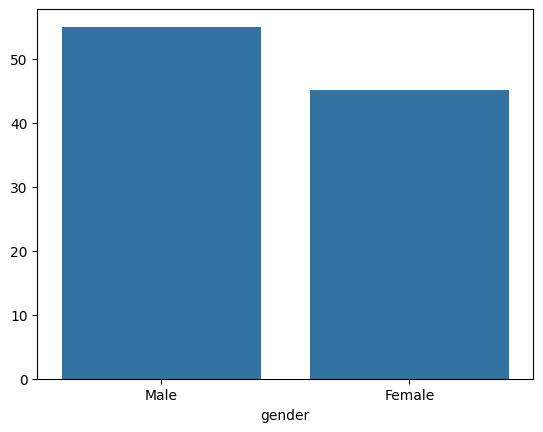

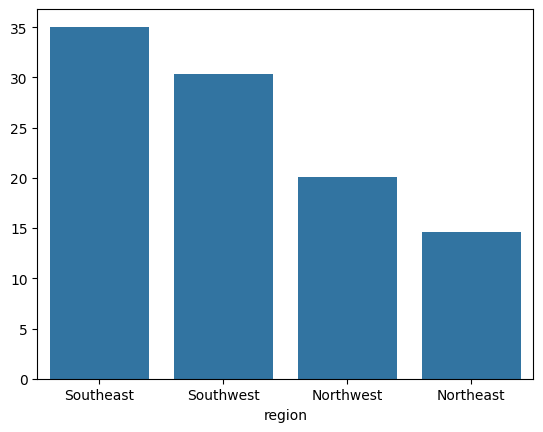

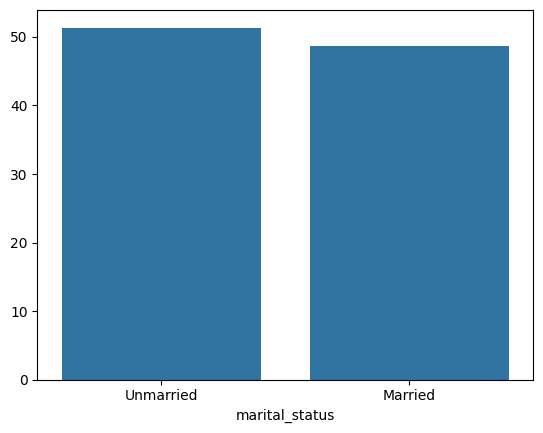

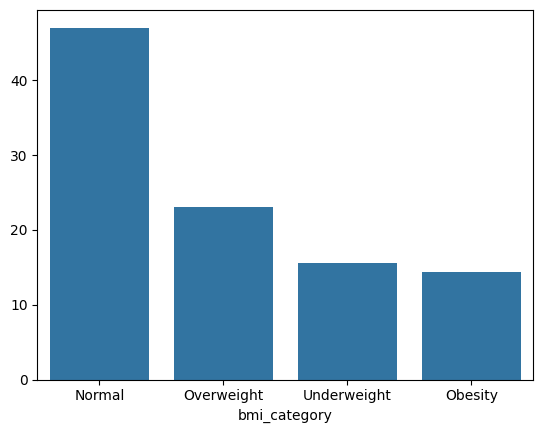

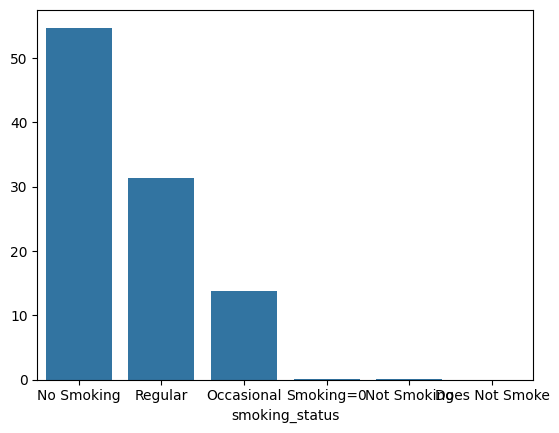

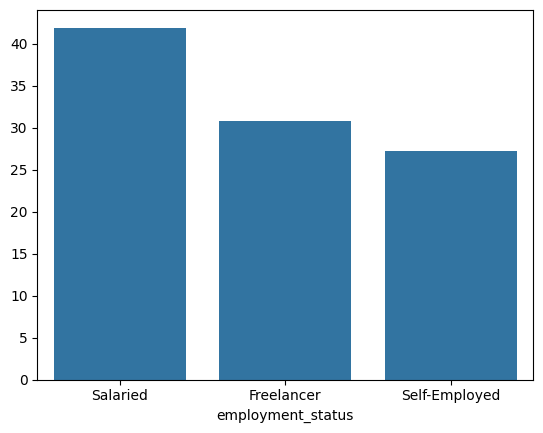

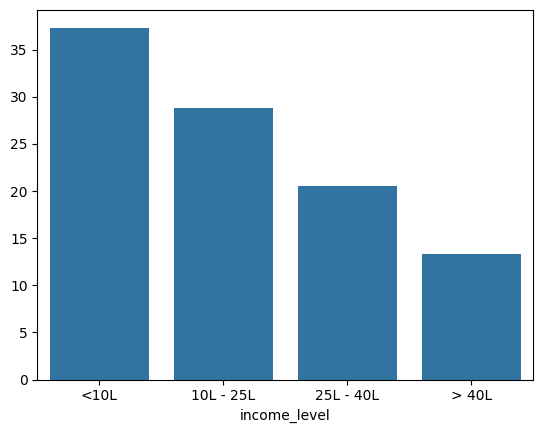

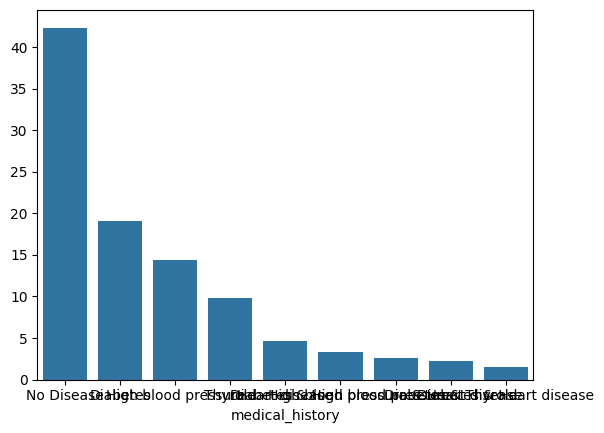

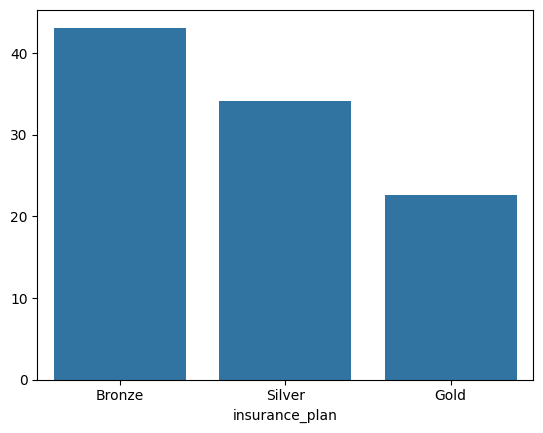

In [106]:
for col in categorical_features:
    category_counts = df[col].value_counts(normalize=True)*100
    sns.barplot(x=category_counts.index, y = category_counts.values)
    plt.show()

In [107]:
crosstab = pd.crosstab(df2['income_level'],df2['insurance_plan'])
crosstab

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         5307  3880    5182
25L - 40L         3683  2840    3750
<10L             12226   931    5486
> 40L              329  3653    2641

### Feature engineering

In [108]:
df2.head(1)

age gender     region marital_status  number_of_dependants bmi_category  \
0   26   Male  Northwest      Unmarried                     0       Normal   

  smoking_status employment_status income_level  income_lakhs medical_history  \
0     No Smoking          Salaried         <10L             6        Diabetes   

  insurance_plan  annual_premium_amount  
0         Bronze                   9053

In [109]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [111]:
risk_scores = {
    'diabetes':6,
    'heart disease':8,
    'high blood pressure':6,
    'thyroid':5,
    'no disease':0,
    'none':0
}

df2[['disease1','disease2']] = df2['medical_history'].str.split('&',expand=True).apply(lambda x:x.str.lower())
df2.head(3)

age  gender     region marital_status  number_of_dependants bmi_category  \
0   26    Male  Northwest      Unmarried                     0       Normal   
1   29  Female  Southeast        Married                     2      Obesity   
2   49  Female  Northeast        Married                     2       Normal   

  smoking_status employment_status income_level  income_lakhs  \
0     No Smoking          Salaried         <10L             6   
1        Regular          Salaried         <10L             6   
2     No Smoking     Self-Employed    10L - 25L            20   

       medical_history insurance_plan  annual_premium_amount  \
0             Diabetes         Bronze                   9053   
1             Diabetes         Bronze                  16339   
2  High blood pressure         Silver                  18164   

              disease1 disease2  
0             diabetes     None  
1             diabetes     None  
2  high blood pressure     None

In [112]:
df2['disease1'] = df2['disease1'].fillna('none')
df2['disease2'] = df2['disease2'].fillna('none')
df2['disease1'] = df2['disease1'].apply(lambda x:x.strip())
df2['disease2'] = df2['disease2'].apply(lambda x:x.strip())
df2['total_risk_score'] = 0

for disease in ['disease1','disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

# normalization
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
print(max_score,min_score)
df2['normalized_risk_score'] = (df2['total_risk_score']-min_score)/(max_score-min_score)
df2.head(7)

14 0


age  gender     region marital_status  number_of_dependants bmi_category  \
0   26    Male  Northwest      Unmarried                     0       Normal   
1   29  Female  Southeast        Married                     2      Obesity   
2   49  Female  Northeast        Married                     2       Normal   
3   30  Female  Southeast        Married                     3       Normal   
4   18    Male  Northeast      Unmarried                     0   Overweight   
5   56    Male  Northeast        Married                     3      Obesity   
6   33    Male  Southeast        Married                     3       Normal   

  smoking_status employment_status income_level  income_lakhs  \
0     No Smoking          Salaried         <10L             6   
1        Regular          Salaried         <10L             6   
2     No Smoking     Self-Employed    10L - 25L            20   
3     No Smoking          Salaried        > 40L            77   
4        Regular     Self-Employed        > 40L            99   
5     Occasional     Self-Employed    10L - 25L            14   
6        Regular     Self-Employed         <10L             4   

                  medical_history insurance_plan  annual_premium_amount  \
0                        Diabetes         Bronze                   9053   
1                        Diabetes         Bronze                  16339   
2             High blood pressure         Silver                  18164   
3                      No Disease           Gold                  20303   
4             High blood pressure         Silver                  13365   
5                        Diabetes         Bronze                  15610   
6  Diabetes & High blood pressure         Silver                  20653   

              disease1             disease2  total_risk_score  \
0             diabetes                 none                 6   
1             diabetes                 none                 6   
2  high blood pressure                 none                 6   
3           no disease                 none                 0   
4  high blood pressure                 none                 6   
5             diabetes                 none                 6   
6             diabetes  high blood pressure                12   

   normalized_risk_score  
0               0.428571  
1               0.428571  
2               0.428571  
3               0.000000  
4               0.428571  
5               0.428571  
6               0.857143

In [113]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1,'Silver':2,'Gold':3})
df2.head(3)
df2.insurance_plan.unique()

array([1, 2, 3], dtype=int64)

In [114]:
df2['income_level'] = df2['income_level'].map({'<10L':1,'10L - 25L':2,'25L - 40L':3,'> 40L':4})
df2.head(3)
df2.income_level.unique()

array([1, 2, 4, 3], dtype=int64)

In [115]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.head(3)

age  number_of_dependants  income_level  income_lakhs      medical_history  \
0   26                     0             1             6             Diabetes   
1   29                     2             1             6             Diabetes   
2   49                     2             2            20  High blood pressure   

   insurance_plan  annual_premium_amount             disease1 disease2  \
0               1                   9053             diabetes     none   
1               1                  16339             diabetes     none   
2               2                  18164  high blood pressure     none   

   total_risk_score  ...  region_Southeast  region_Southwest  \
0                 6  ...                 0                 0   
1                 6  ...                 1                 0   
2                 6  ...                 0                 0   

   marital_status_Unmarried  bmi_category_Obesity  bmi_category_Overweight  \
0                         1                     0                        0   
1                         0                     1                        0   
2                         0                     0                        0   

   bmi_category_Underweight  smoking_status_Occasional  \
0                         0                          0   
1                         0                          0   
2                         0                          0   

   smoking_status_Regular  employment_status_Salaried  \
0                       0                           1   
1                       1                           1   
2                       0                           0   

   employment_status_Self-Employed  
0                                0  
1                                0  
2                                1  

[3 rows x 23 columns]

In [116]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49908 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              49908 non-null  int64  
 1   number_of_dependants             49908 non-null  int64  
 2   income_level                     49908 non-null  int64  
 3   income_lakhs                     49908 non-null  int64  
 4   medical_history                  49908 non-null  object 
 5   insurance_plan                   49908 non-null  int64  
 6   annual_premium_amount            49908 non-null  int64  
 7   disease1                         49908 non-null  object 
 8   disease2                         49908 non-null  object 
 9   total_risk_score                 49908 non-null  int64  
 10  normalized_risk_score            49908 non-null  float64
 11  gender_Male                      49908 non-null  int32  
 12  region_Northwest       

### Feature selection

In [117]:
df4 = df3.drop(['medical_history','disease1', 'disease2', 'total_risk_score'], axis=1)
df4.head(3) 

age  number_of_dependants  income_level  income_lakhs  insurance_plan  \
0   26                     0             1             6               1   
1   29                     2             1             6               1   
2   49                     2             2            20               2   

   annual_premium_amount  normalized_risk_score  gender_Male  \
0                   9053               0.428571            1   
1                  16339               0.428571            0   
2                  18164               0.428571            0   

   region_Northwest  region_Southeast  region_Southwest  \
0                 1                 0                 0   
1                 0                 1                 0   
2                 0                 0                 0   

   marital_status_Unmarried  bmi_category_Obesity  bmi_category_Overweight  \
0                         1                     0                        0   
1                         0                     1                        0   
2                         0                     0                        0   

   bmi_category_Underweight  smoking_status_Occasional  \
0                         0                          0   
1                         0                          0   
2                         0                          0   

   smoking_status_Regular  employment_status_Salaried  \
0                       0                           1   
1                       1                           1   
2                       0                           0   

   employment_status_Self-Employed  
0                                0  
1                                0  
2                                1

### Handling multicollinearity with VIF

In [118]:
X = df4.drop('annual_premium_amount',axis=1)
Y = df4['annual_premium_amount']

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    vif_df = pd.DataFrame()
    vif_df['variables'] = X.columns
    num_cols = X.shape[1]
    vif_df['vif'] = [variance_inflation_factor(X.values,i) for i in range(num_cols)]

    return vif_df

In [120]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan']

scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [121]:
calculate_vif(X)

variables        vif
0                               age   4.567634
1              number_of_dependants   4.534650
2                      income_level  12.450675
3                      income_lakhs  11.183367
4                    insurance_plan   3.584752
5             normalized_risk_score   2.687610
6                       gender_Male   2.421496
7                  region_Northwest   2.102556
8                  region_Southeast   2.922414
9                  region_Southwest   2.670666
10         marital_status_Unmarried   3.411185
11             bmi_category_Obesity   1.352806
12          bmi_category_Overweight   1.549922
13         bmi_category_Underweight   1.302886
14        smoking_status_Occasional   1.272745
15           smoking_status_Regular   1.777089
16       employment_status_Salaried   2.382134
17  employment_status_Self-Employed   2.137753

In [122]:
calculate_vif(X.drop('income_level',axis=1))

variables       vif
0                               age  4.545825
1              number_of_dependants  4.526598
2                      income_lakhs  2.480563
3                    insurance_plan  3.445682
4             normalized_risk_score  2.687326
5                       gender_Male  2.409980
6                  region_Northwest  2.100789
7                  region_Southeast  2.919775
8                  region_Southwest  2.668314
9          marital_status_Unmarried  3.393718
10             bmi_category_Obesity  1.352748
11          bmi_category_Overweight  1.549907
12         bmi_category_Underweight  1.302636
13        smoking_status_Occasional  1.272744
14           smoking_status_Regular  1.777024
15       employment_status_Salaried  2.374628
16  employment_status_Self-Employed  2.132810

In [123]:
X_reduced = X.drop('income_level',axis=1)

## Model Training

In [124]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_reduced,Y,test_size=0.30,random_state=10)

### Linear Regression

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm_model = LinearRegression()
lm_model.fit(X_train,Y_train)

print('train_score',lm_model.score(X_train,Y_train))
print('test_score',lm_model.score(X_test,Y_test))

Y_pred = lm_model.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
print('mse = ',mse)
print('rmse = ',np.sqrt(mse))

train_score 0.9282143576916762
test_score 0.9280547230217837
mse =  5165611.913027984
rmse =  2272.7982561212916


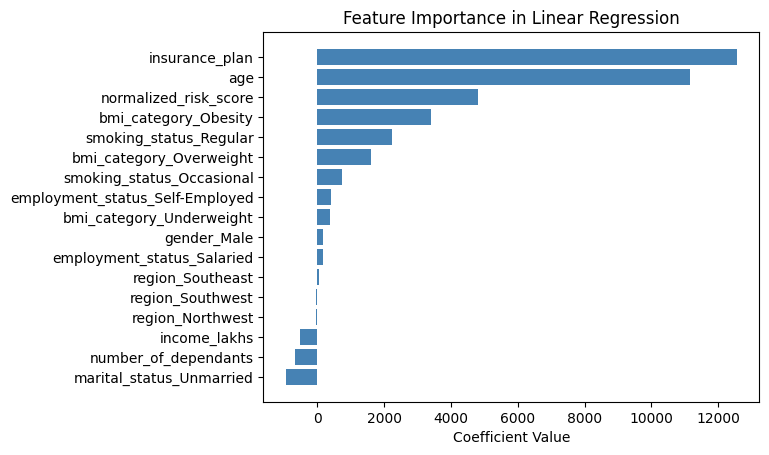

In [ ]:
feature_importance = lm_model.coef_ 

coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

### Ridge Regression

In [127]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train,Y_train)

print('train_score',ridge_model.score(X_train,Y_train))
print('test_score',ridge_model.score(X_test,Y_test))

Y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
print('mse = ',mse)
print('rmse = ',np.sqrt(mse))

train_score 0.9282143198366275
test_score 0.9280541644640345
mse =  5165652.017016522
rmse =  2272.8070787060924


### XGBoost

In [128]:
from xgboost import XGBRegressor

xg_model =XGBRegressor(n_estimators=20, max_depth=3)
xg_model.fit(X_train,Y_train)

print('train_score',xg_model.score(X_train,Y_train))
print('test_score',xg_model.score(X_test,Y_test))

Y_pred = xg_model.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
print('mse = ',mse)
print('rmse = ',np.sqrt(mse))

train_score 0.978065013885498
test_score 0.9782300591468811
mse =  1563064.1356043513
rmse =  1250.2256338774819


In [129]:
from sklearn.model_selection import RandomizedSearchCV

model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, Y_train)
random_search.best_score_

0.9809474547704061

In [130]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [131]:
best_model = random_search.best_estimator_

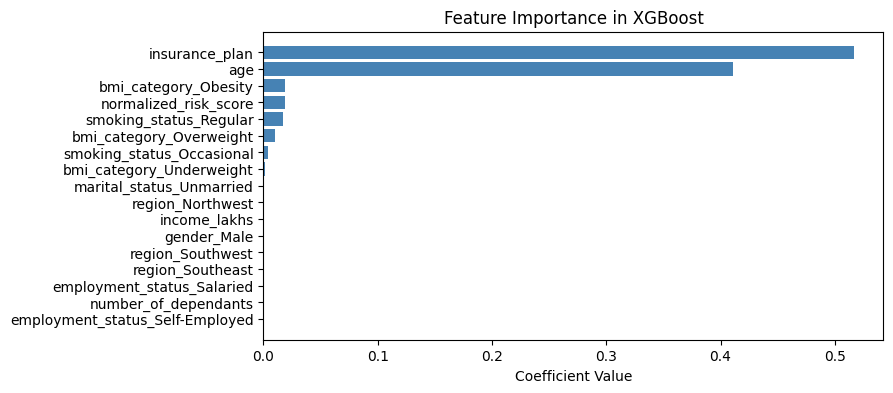

In [132]:
feature_importance = best_model.feature_importances_
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

## Error Analysis

In [134]:
Y_pred = best_model.predict(X_test)

residuals = Y_pred - Y_test
residuals_pct = (residuals / Y_test) * 100

results_df = pd.DataFrame({
    'actual': Y_test, 
    'predicted': Y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.head()

# we can see in some samples error rate is close to 50% which is not good

actual     predicted         diff   diff_pct
3598    20554  20334.953125  -219.046875  -1.065714
35794   29647  29378.779297  -268.220703  -0.904714
43608   20560  20618.185547    58.185547   0.283004
42730    5018   7352.829590  2334.829590  46.529087
18936    8929   8203.291992  -725.708008  -8.127540

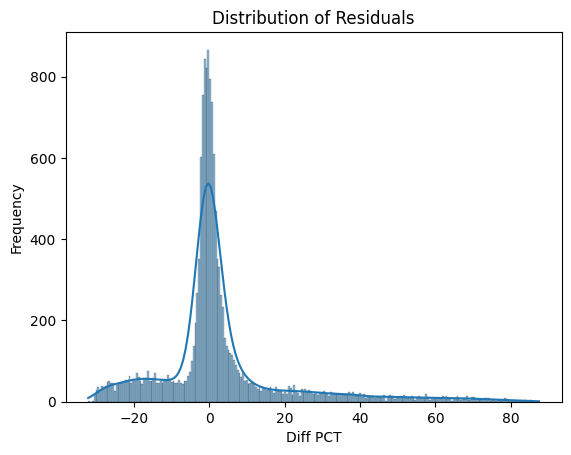

In [ ]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

# some customer will be undercharge or overcharge by 80% , which is not a good user experience

In [137]:
extreme_error_threshold = 10 
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_results_df.shape

(4487, 4)

In [138]:
results_df.shape

(14973, 4)

In [139]:
extreme_errors_pct = extreme_results_df.shape[0]*100/X_test.shape[0]
extreme_errors_pct

29.967274427302478

##### We have 30% extreme errors which means for 30% customers we will either overcharge or undercharge by 10% or more

In [140]:
extreme_results_df[abs(extreme_results_df.diff_pct)>50].sort_values("diff_pct",ascending=False)

actual    predicted         diff   diff_pct
36269    3501  6565.852051  3064.852051  87.542189
48801    3516  6565.852051  3049.852051  86.742095
42342    3521  6565.852051  3044.852051  86.476911
18564    3523  6565.852051  3042.852051  86.371049
7988     3527  6565.852051  3038.852051  86.159684
...       ...          ...          ...        ...
32671    4656  6994.980957  2338.980957  50.235845
14798    4371  6565.852051  2194.852051  50.213957
13736    4371  6565.852051  2194.852051  50.213957
10107    4710  7073.240723  2363.240723  50.174962
16908    4699  7053.477539  2354.477539  50.105928

[549 rows x 4 columns]

##### There will be about 549 customers whom we will overcharge or underchage by more than 50%

In [142]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head(2)

age  number_of_dependants  income_lakhs  insurance_plan  \
42730  0.092593                   0.2      0.131313             0.0   
20029  0.018519                   0.2      0.030303             0.0   

       normalized_risk_score  gender_Male  region_Northwest  region_Southeast  \
42730               0.428571            1                 0                 0   
20029               0.000000            0                 1                 0   

       region_Southwest  marital_status_Unmarried  bmi_category_Obesity  \
42730                 0                         1                     0   
20029                 0                         1                     0   

       bmi_category_Overweight  bmi_category_Underweight  \
42730                        1                         0   
20029                        0                         1   

       smoking_status_Occasional  smoking_status_Regular  \
42730                          0                       0   
20029                          0                       0   

       employment_status_Salaried  employment_status_Self-Employed  
42730                           0                                0  
20029                           1                                0

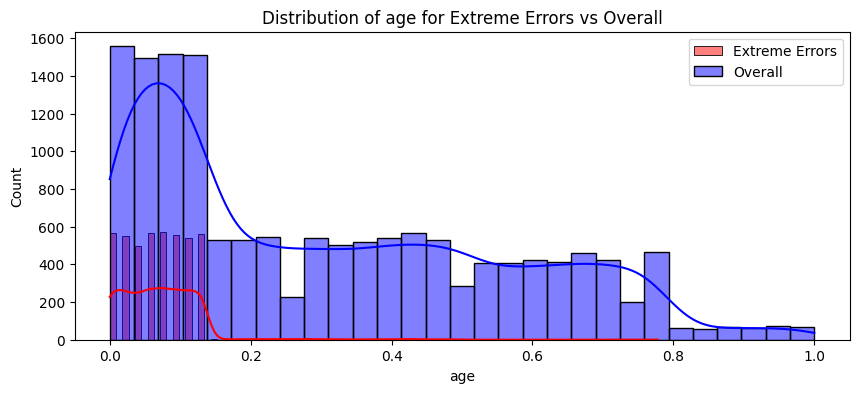

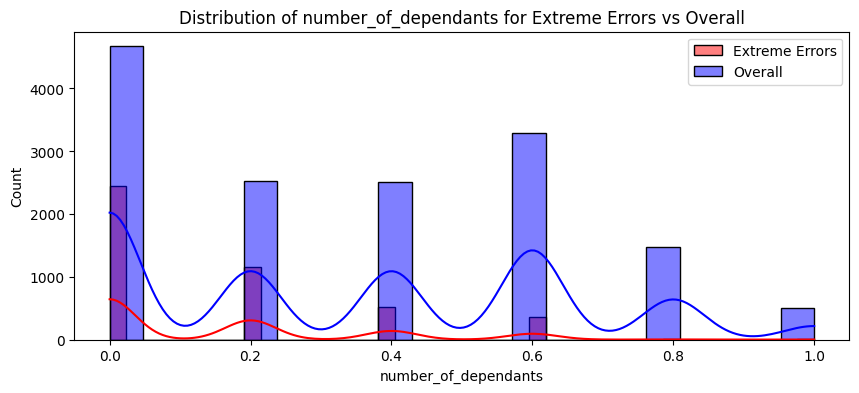

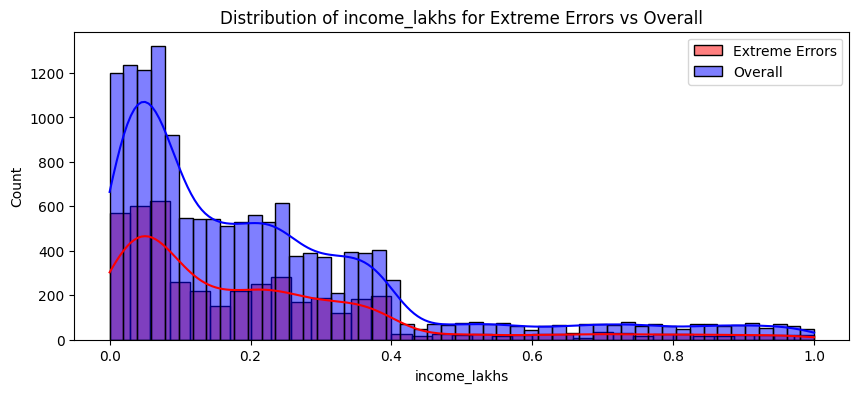

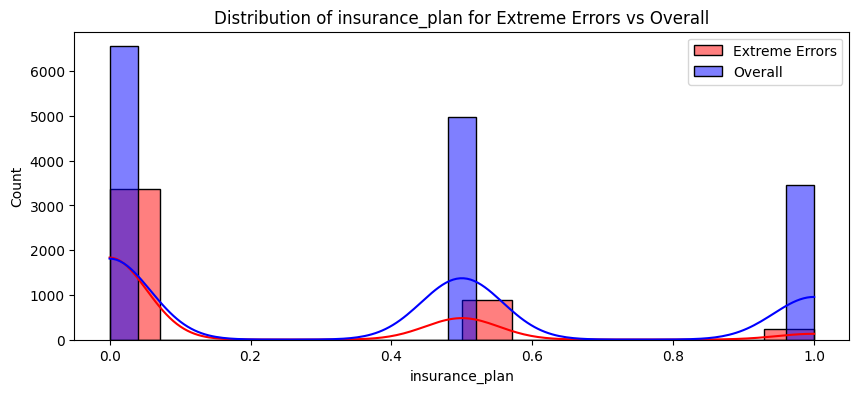

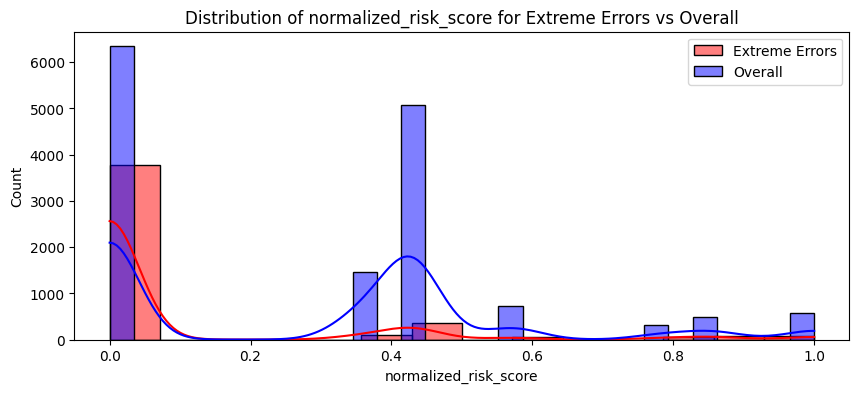

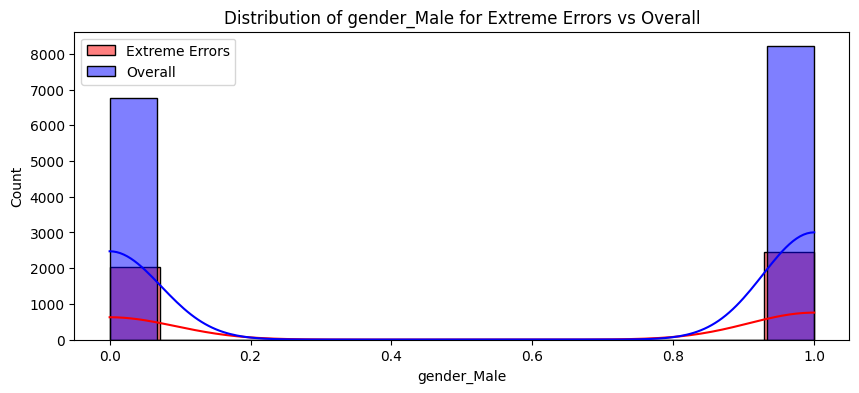

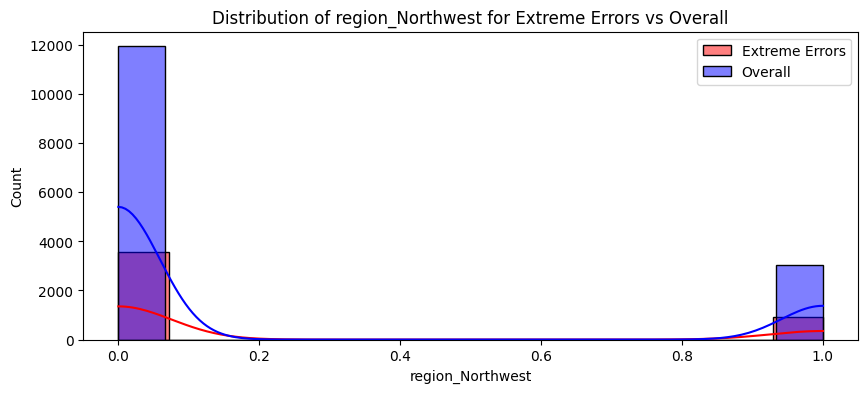

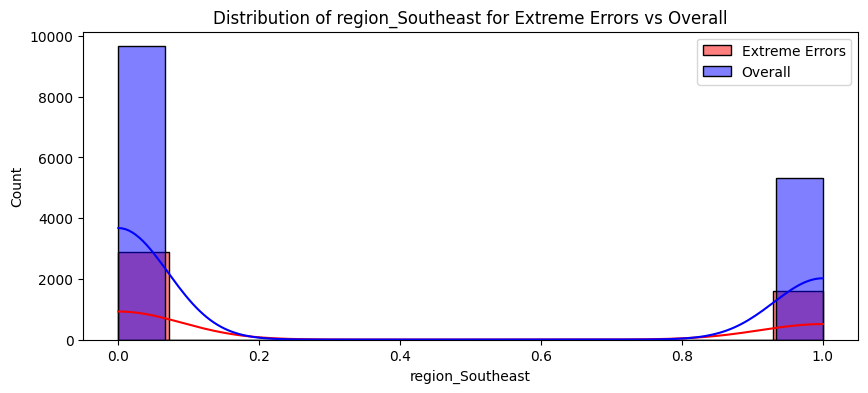

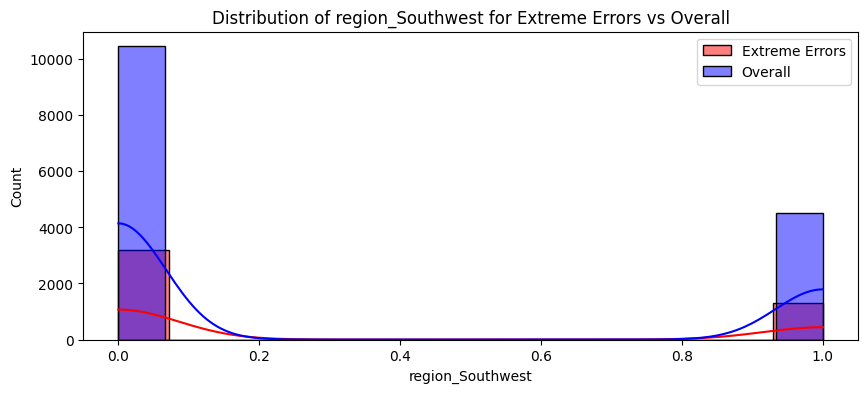

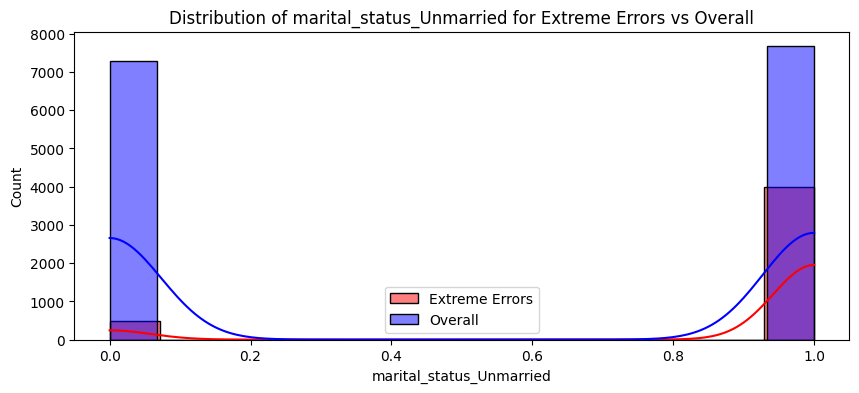

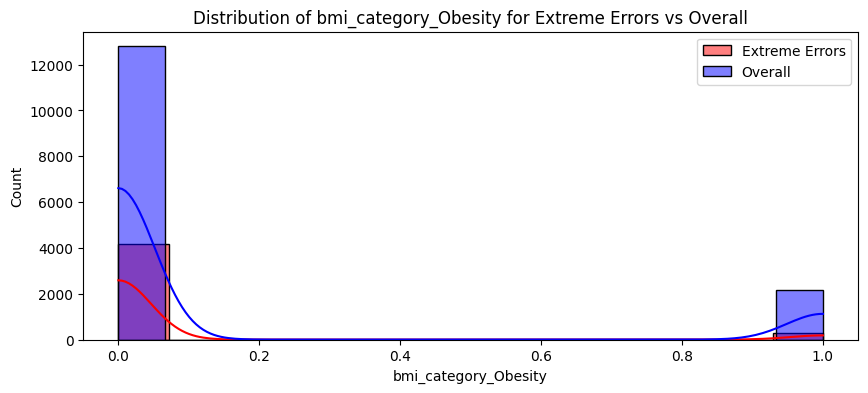

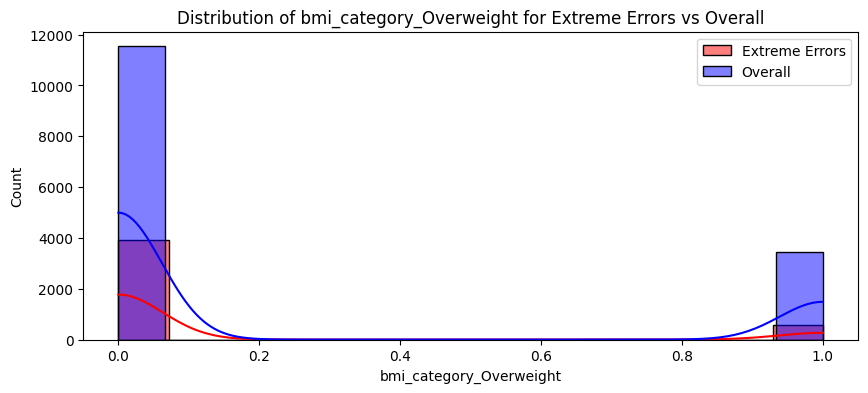

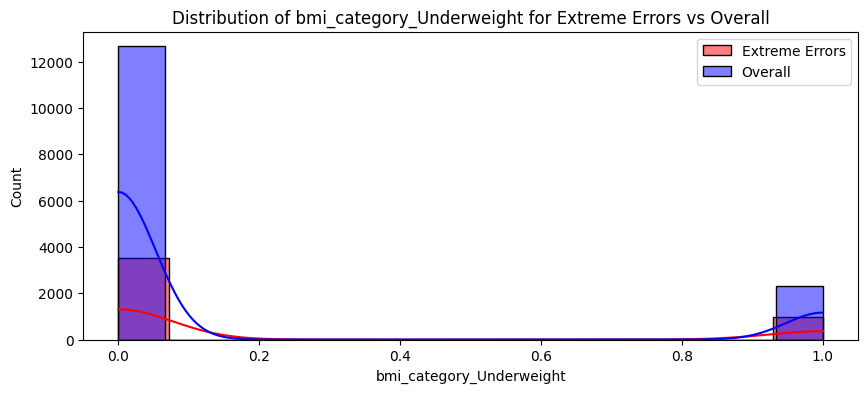

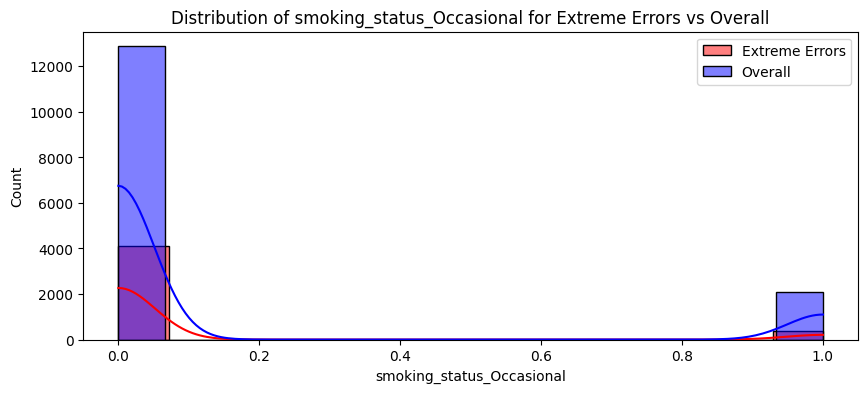

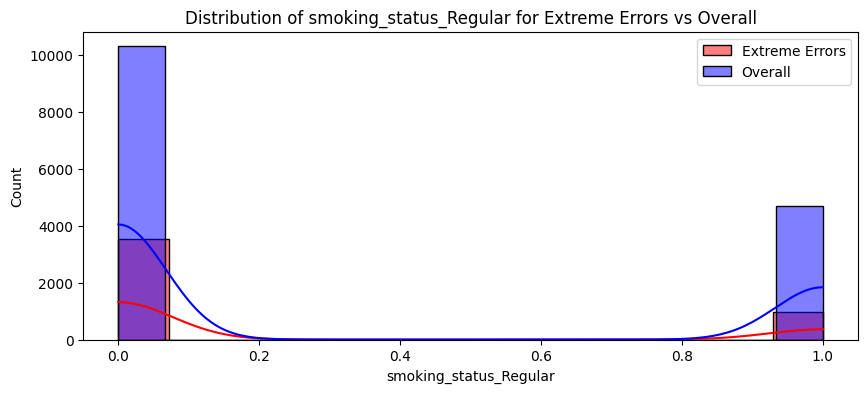

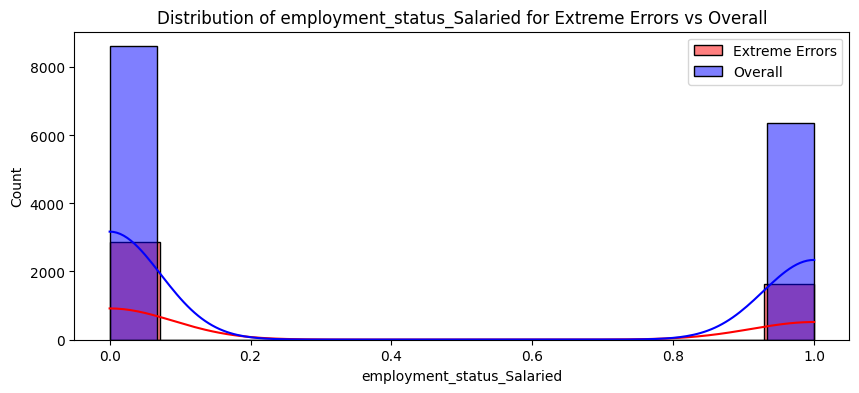

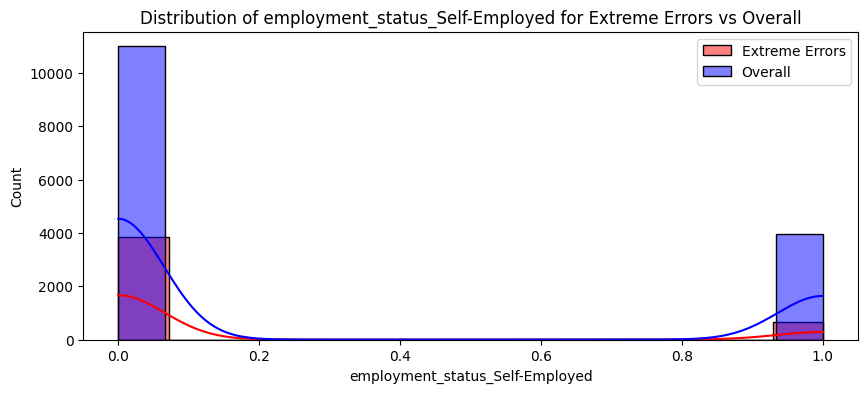

In [ ]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()


In [ ]:
extreme_errors_df['income_level'] = -1 
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed.head()

age  number_of_dependants  income_level  income_lakhs  insurance_plan
0  23.0                   1.0          -2.0          14.0             1.0
1  19.0                   1.0          -2.0           4.0             1.0
2  18.0                   1.0          -2.0           3.0             1.0
3  21.0                   0.0          -2.0          25.0             1.0
4  24.0                   1.0          -2.0           8.0             2.0

In [ ]:
df_reversed.describe()

age  number_of_dependants  income_level  income_lakhs  \
count  4487.000000           4487.000000        4487.0   4487.000000   
mean     21.804992              0.739247          -2.0     21.182527   
std       3.172355              0.968855           0.0     20.598596   
min      18.000000              0.000000          -2.0      1.000000   
25%      20.000000              0.000000          -2.0      6.000000   
50%      22.000000              0.000000          -2.0     15.000000   
75%      24.000000              1.000000          -2.0     30.000000   
max      60.000000              5.000000          -2.0    100.000000   

       insurance_plan  
count     4487.000000  
mean         1.302429  
std          0.563135  
min          1.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          3.000000

In [ ]:
df_reversed['age'].quantile(0.97)

25.0

## Conclusion
Since 97% extreme records have age<=25, so we need to make a separate model with extra feature engineering.<br/>
So there are two models 1. age<=25  and 2. age>25